<a href="https://colab.research.google.com/github/Elma-dev/continent_peoples_classification_fast_ai/blob/main/continent_peoples_classification_fast_ai.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
from fastcore.all import *
from duckduckgo_search import ddg_images

In [4]:
#Test To get Image Using ddg_images
L(ddg_images("africans photos",max_results=2)).itemgot("image")

/usr/local/lib/python3.10/dist-packages/duckduckgo_search/compat.py:40: UserWarning: ddg_images is deprecated. Use DDGS().images() generator
  warnings.warn("ddg_images is deprecated. Use DDGS().images() generator")


(#9) ['https://www.africa.com/wp-content/uploads/2023/07/Afdb.jpg','https://www.ndangira.net/wp-content/uploads/2023/10/African-Union-Recruitment.jpg','https://im.rediff.com/money/2023/oct/03africa.jpg','https://image7.slideserve.com/12522380/bestselling-new-book-releases-african-origin-l.jpg','https://afronews.de/wp-content/uploads/2017/05/African-Youth-AfricanTide.jpg','https://i.pinimg.com/736x/a2/ad/ff/a2adff27f28f91d18450cfaa5fa927e9.jpg','https://i.pinimg.com/originals/05/ed/87/05ed876c3a4d341d58f256356adac730.jpg','http://images.huffingtonpost.com/2014-05-18-AfricaGood.png','https://i.pinimg.com/736x/a6/02/0b/a6020b6ac0db0111e3c1547d342f441f--africa-people-world-cultures.jpg']

In [5]:
#create Function could get any image
def search_images(term,nbr_results=30):
    return L(ddg_images(term,max_results=nbr_results)).itemgot("image")

In [6]:
#Test Search image function
images_url=search_images("africans people photos",4)
images_url

(#10) ['https://get.pxhere.com/photo/people-woman-female-young-carnival-color-africa-child-black-tribe-festival-temple-tradition-african-mumuila-1067744.jpg','https://isorepublic.com/wp-content/uploads/2018/11/africa-tribe.jpg','https://i.pinimg.com/originals/02/68/de/0268ded9315728ee2618a9996e10bea0.jpg','https://www.tripsavvy.com/thmb/uKtngIYS8TmnJ9lmmi__5jK0t1U=/2121x1414/filters:fill(auto,1)/GettyImages-637563890-e465202eb7e04293a21d8ab7c272a6d1.jpg','https://i.dailymail.co.uk/i/pix/2015/11/16/11/2E7D782D00000578-3320209-Women_from_the_Arbore_tribe_cover_their_heads_with_black_cloths_-a-19_1447672481694.jpg','https://safaritalk.s3.amazonaws.com/monthly_11_2012/post-4018-0-03257700-1353005525.jpg','https://2.bp.blogspot.com/-5C3noHH9-VE/VzlrdmU2fxI/AAAAAAAAJLo/jbFsOSApe3YmbTizFiMQFsipItm3rW1uQCLcB/s1600/Masaai+of+SOUTHERN+KENYA+AND+NORTHERN+TANZANIA3.jpg','https://thumbs.dreamstime.com/z/people-africa-5546805.jpg','https://img.freepik.com/premium-photo/happy-african-american-senior-

In [7]:
#Dowlload of images
from fastdownload import download_url
my_dest="african.jpg"
download_url(images_url[0],my_dest)

Path('african.jpg')

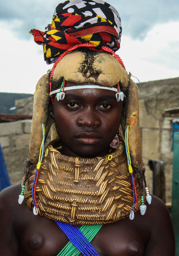

In [11]:
#show image
from fastai.vision.all import *
im=Image.open(my_dest)
im.to_thumb(256)

In [12]:
#Search about photos of people in each continent
from time import sleep
continents="asia","africa","europe","north america","australia","south america","antartica"
path=Path("continents")

for c in continents:
    dest=(path/c)
    dest.mkdir(exist_ok=True,parents=True)
    download_images(dest=dest, urls=search_images(f'{c} people photo'))
    sleep(10)
    resize_images(path/c,max_size=400,dest=path/c)

/usr/local/lib/python3.10/dist-packages/duckduckgo_search/compat.py:40: UserWarning: ddg_images is deprecated. Use DDGS().images() generator
  warnings.warn("ddg_images is deprecated. Use DDGS().images() generator")


In [20]:
#Validate download images
failed=verify_images(get_image_files(path))
print(f'Number of invalid images {len(failed)}')
failed.map(Path.unlink)

Number of invalid images 0


(#0) []

In [24]:
#create Data block
datablock=DataBlock(
    blocks=(ImageBlock,CategoryBlock), #blocks=(ImageBlock, CategoryBlock),The inputs to our model are images, and the outputs are categories.
    get_items=get_image_files,         #To find all the inputs to our model, run the get_image_files function (which returns a list of all image files in a path).
    get_y=parent_label,                #The labels (y values) is the name of the parent of each file
    splitter=RandomSplitter(valid_pct=0.2,seed=42), #Split the data into training and validation sets randomly, using 20% of the data for the validation set.
    item_tfms=[Resize(192,method="squish")] #Before training, resize each image to 192x192 pixels by "squishing" it (as opposed to cropping it).
    ).dataloaders(path,bs=32)

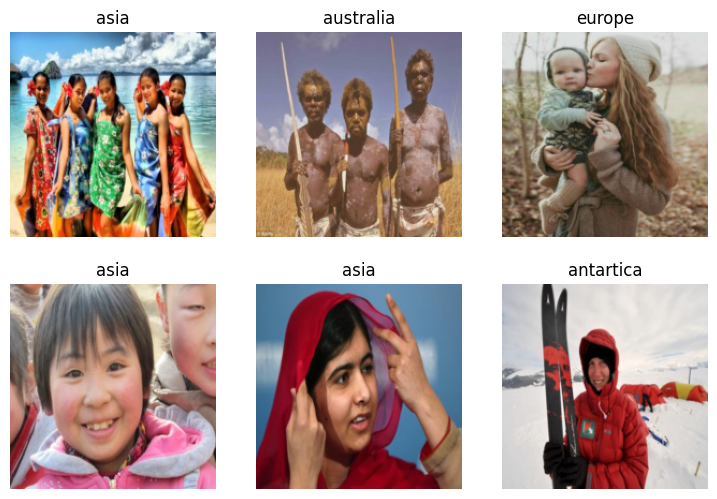

In [25]:
datablock.show_batch(max_n=6)

In [27]:
model=vision_learner(datablock,resnet18,metrics=error_rate)
model.fine_tune(10)

epoch,train_loss,valid_loss,error_rate,time
0,3.206449,2.269827,0.695652,00:16


epoch,train_loss,valid_loss,error_rate,time
0,2.018771,1.905360,0.630435,00:23
1,1.666668,1.659658,0.608696,00:22
2,1.326503,1.484596,0.565217,00:23
3,1.044010,1.450494,0.565217,00:22
4,0.840689,1.470757,0.565217,00:23
5,0.693516,1.489754,0.565217,00:23
6,0.593449,1.490054,0.565217,00:23
7,0.500357,1.487394,0.586957,00:23
8,0.436759,1.459831,0.521739,00:23
9,0.384111,1.481334,0.521739,00:23


In [29]:
result,_,proba=model.predict(PILImage.create("african.jpg"))

In [31]:
print(f"the people(s) in image is {result}n")

the people(s) in image is african


In [35]:
#Test with other images
asian=search_images("asian people",1)
download_url(url=asian[0],dest="asianPeople.jpg")

/usr/local/lib/python3.10/dist-packages/duckduckgo_search/compat.py:40: UserWarning: ddg_images is deprecated. Use DDGS().images() generator
  warnings.warn("ddg_images is deprecated. Use DDGS().images() generator")


Path('asianPeople.jpg')

In [36]:
model.predict(PILImage.create("asianPeople.jpg"))

('asia',
 tensor(2),
 tensor([0.0038, 0.0023, 0.8104, 0.0011, 0.0167, 0.0447, 0.1210]))

In [42]:
morocco=search_images("moroccan people",1)
download_url(morocco[0],"morocco2.jpg")

/usr/local/lib/python3.10/dist-packages/duckduckgo_search/compat.py:40: UserWarning: ddg_images is deprecated. Use DDGS().images() generator
  warnings.warn("ddg_images is deprecated. Use DDGS().images() generator")


Path('morocco2.jpg')

In [41]:
model.predict(PILImage.create("morocco.jpg"))

('south america',
 tensor(6),
 tensor([4.9776e-02, 4.8938e-04, 3.5530e-03, 3.1966e-02, 7.6942e-02, 7.2212e-02,
         7.6506e-01]))